In [1]:
import pycbc.waveform
from pycbc.waveform import td_approximants
import os
import matplotlib.pyplot as plt
import pylab
from pycbc.filter import match
import numpy as np
from pycbc.psd import aLIGOZeroDetHighPower
from constants import *
from tqdm import tqdm
from pycbc.waveform import get_td_waveform
from multiprocess import Pool
import pickle

In [2]:
f_lower = 10
delta_t = 1./2048
inc=pi/3
#distance=1e6*pc
order=3
f_lower = 10
matchfactor=0.99
u0=0
uf=0
phase_order = -1
dist=1

In [3]:
ecc=1.2;q=1

In [4]:
def hypgw(M,b,e,f_lower):
    hp, hc = get_td_waveform(approximant='HyperbolicTD',
                                 mass1=M/2,
                                 mass2=M/2,
                                 delta_t=delta_t,
                                 hyp_eccentricity = ecc,
                                 b = b,
                                 inclination = inc,
                                 ui = u0,
                                 uf = uf,
                                 distance = dist,
                                 phase_order = phase_order,
                                 f_lower = f_lower )
    return hc

In [5]:
from hyp_td_waveform_v2 import get_hyp_waveform

In [6]:
def hypgws(M,b,e,f_lower='None'):
    hp,hc=get_hyp_waveform(M,q,e,b,delta_t,inc,dist*1e6*pc,order,flow=f_lower)
    return hc

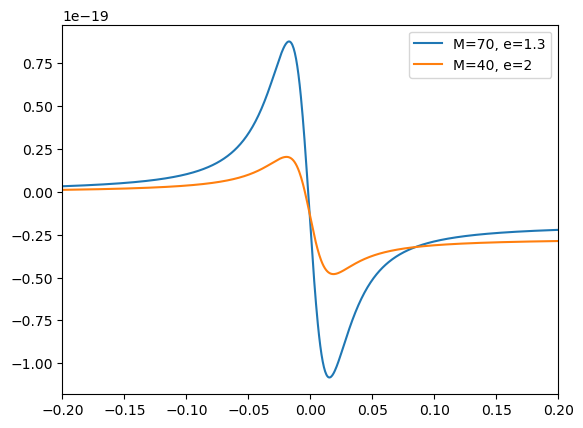

In [12]:
b=60
a1=hypgws(70,b,1.3)
a2=hypgws(40,b,2)
plt.plot(a1.sample_times,a1,label='M=70, e=1.3')
plt.plot(a2.sample_times,a2,label='M=40, e=2')
plt.xlim([-0.2,0.2])
plt.legend()
plt.savefig('fig_b_'+str(b)+'_Subhajit_without_flow.png',dpi=300)
plt.show()

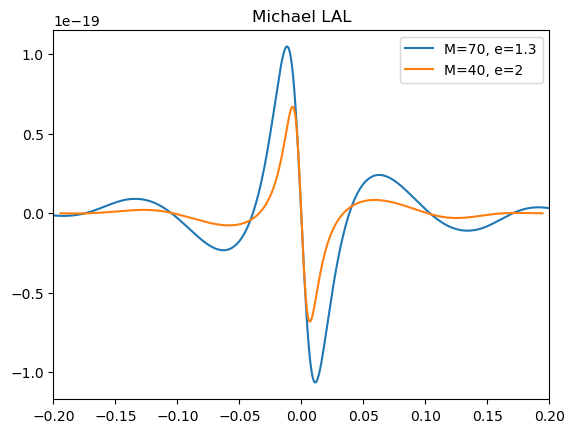

In [8]:
b=60
a1=hypgw(70,b,1.3,10)
a2=hypgw(40,b,2,10)
plt.plot(a1.sample_times,a1,label='M=70, e=1.3')
plt.plot(a2.sample_times,a2,label='M=40, e=2')
plt.title('Michael LAL')
plt.legend()
plt.xlim([-0.2,0.2])
plt.savefig('fig_b_'+str(b)+'_LAL.png',dpi=300)
plt.show()

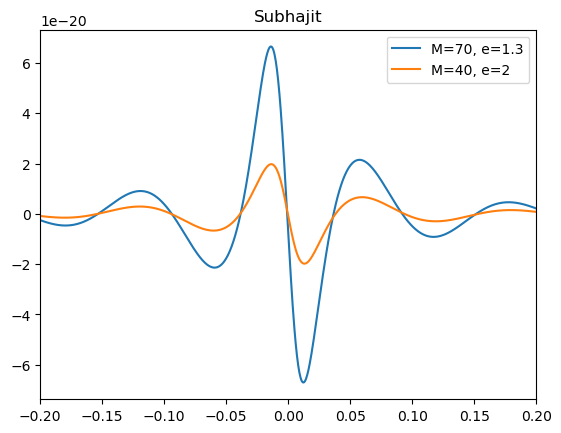

In [9]:
b=60
a1=hypgws(70,b,1.3,10)
a2=hypgws(40,b,2,10)
plt.plot(a1.sample_times,a1,label='M=70, e=1.3')
plt.plot(a2.sample_times,a2,label='M=40, e=2')
plt.xlim([-0.2,0.2])
plt.title('Subhajit')
plt.legend()
plt.savefig('fig_b_'+str(b)+'_subhajit.png',dpi=300)
plt.show()

In [10]:
pwd

'/Users/subhajit/Dropbox/LIGO/Original/sample_LAL'